# Analysis - exp21

Repeats of stumbler in self_play.

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored

# Find the files
## Exp 21

In [2]:
path = "/Users/type/Code/azad/data/wythoff/exp21/"
results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*_monitor.csv")))
files[:10]

exp_21 = []
for fi in files:
    mon = load_monitored(fi)
    exp_21.append(mon)

In [3]:
pprint(exp_21[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])


In [4]:
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_21]))

0.8391719961466536


# Plots

## Optimal play

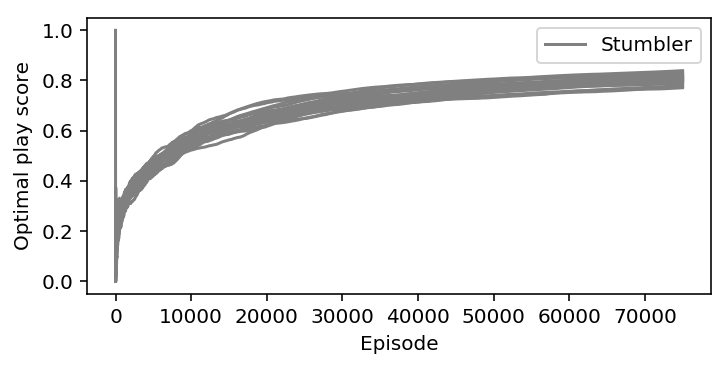

In [5]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_21):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler"
        
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='grey', alpha=1,  label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")